# PCA降维
首先通过一个2D数据集进行实验，以获得关于PCA如何工作的直观感受，然后在一个更大的人脸图像数据集上使用它。

## 一、 二维数据集
在本练习中，首先实现PCA并将其应用于一个简单的二维数据集，以了解它是如何工作的，从加载和可视化数据集开始。

(50, 2)


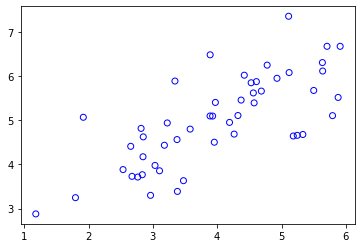

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
mat = loadmat('date/ex7data1.mat')
X = mat['X']
print(X.shape)
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')


## 数据预处理


In [8]:
def featureNormalize(X):
    means = X.mean(axis=0)#对X中的每个特征求均值（axis 不设置值，对 m*n 个数求均值，返回一个实数，axis = 0：压缩行，对各列求均值，返回 1* n 矩阵
                           #axis =1 ：压缩列，对各行求均值，返回 m *1 矩阵）
    stds = X.std(axis=0, ddof=1)#求标准差
    X_norm = (X - means) / stds#均值归一化
    return X_norm, means, stds

## PCA
PCA由两部分组成：
1、计算数据的方差矩阵
2、用SVD计算特征向量$(U_1,U_22,...,U_n)$

In [9]:
def pca(X):
    sigma = (X.T @ X) / len(X)#方差矩阵
    U, S, V = np.linalg.svd(sigma)#svd
    
    return U, S, V

[-0.70710678 -0.70710678]


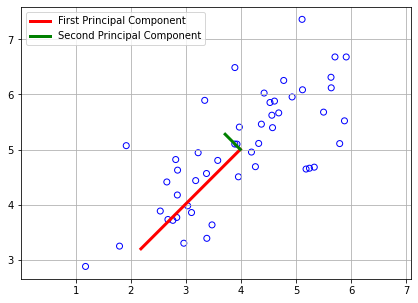

In [10]:
X_norm, means, stds = featureNormalize(X)
U, S, V = pca(X_norm)

print(U[:,0]) 
plt.figure(figsize=(7, 5))
plt.scatter(X[:,0], X[:,1], facecolors='none', edgecolors='b')

plt.plot([means[0], means[0] + 1.5*S[0]*U[0,0]], 
         [means[1], means[1] + 1.5*S[0]*U[0,1]],
        c='r', linewidth=3, label='First Principal Component')
plt.plot([means[0], means[0] + 1.5*S[1]*U[1,0]], 
         [means[1], means[1] + 1.5*S[1]*U[1,1]],
        c='g', linewidth=3, label='Second Principal Component')
plt.grid()
# changes limits of x or y axis so that equal increments of x and y have the same length
# 不然看着不垂直，不舒服。：）
plt.axis("equal")  
plt.legend()

## PCA降维

In [11]:
def projectData(X, U, K):
    Z = X @ U[:,:K]#对应公式z=X*U_reduce
    
    return Z

In [12]:
# project the first example onto the first dimension 
# and you should see a value of about 1.481
Z = projectData(X_norm, U, 1)#降到一维
Z[0]

array([1.48127391])

## 重建数据

In [13]:
def recoverData(Z, U, K):
    X_rec = Z @ U[:,:K].T
    
    return X_rec


In [14]:
# you will recover an approximation of the first example and you should see a value of
# about [-1.047 -1.047].
X_rec = recoverData(Z, U, 1)
X_rec[0]


array([-1.04741883, -1.04741883])

## 可视化投影

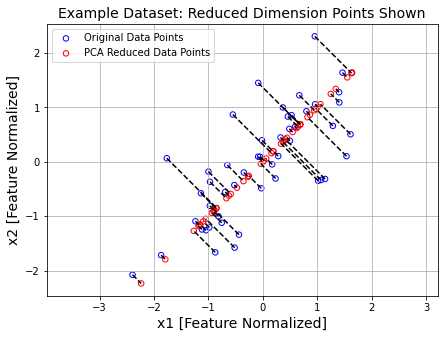

In [15]:
plt.figure(figsize=(7,5))
plt.axis("equal") 
plot = plt.scatter(X_norm[:,0], X_norm[:,1], s=30, facecolors='none', 
                   edgecolors='b',label='Original Data Points')
plot = plt.scatter(X_rec[:,0], X_rec[:,1], s=30, facecolors='none', 
                   edgecolors='r',label='PCA Reduced Data Points')

plt.title("Example Dataset: Reduced Dimension Points Shown",fontsize=14)
plt.xlabel('x1 [Feature Normalized]',fontsize=14)
plt.ylabel('x2 [Feature Normalized]',fontsize=14)
plt.grid(True)

for x in range(X_norm.shape[0]):
    plt.plot([X_norm[x,0],X_rec[x,0]],[X_norm[x,1],X_rec[x,1]],'k--')
    # 输入第一项全是X坐标，第二项都是Y坐标
plt.legend()

# PCA在人脸数据集上的应用
在这部分练习中，将人脸图像上运行PCA，看看如何在实践中使用它来减少维度。

In [17]:
mat = loadmat('date/ex7faces.mat')
X = mat['X']
print(X.shape)

(5000, 1024)


## 加载并可视化前100个人脸图像

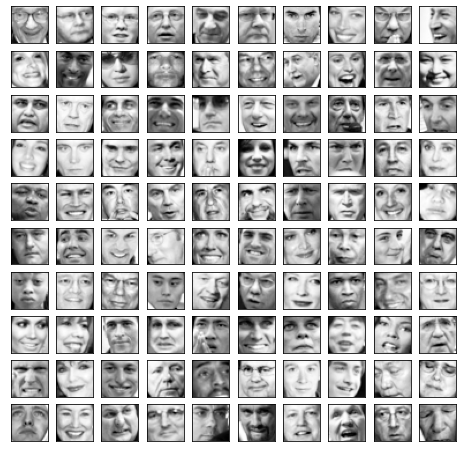

In [18]:
def displayData(X, row, col):
    fig, axs = plt.subplots(row, col, figsize=(8,8))
    for r in range(row):
        for c in range(col):
            axs[r][c].imshow(X[r*col + c].reshape(32,32).T, cmap = 'Greys_r')
            axs[r][c].set_xticks([])
            axs[r][c].set_yticks([])
            
displayData(X, 10, 10)

## PCA on Faces

In [19]:
X_norm, means, stds = featureNormalize(X)#调用数据预处理函数

U, S, V = pca(X_norm)#调用PCA函数

In [20]:
U.shape, S.shape

((1024, 1024), (1024,))

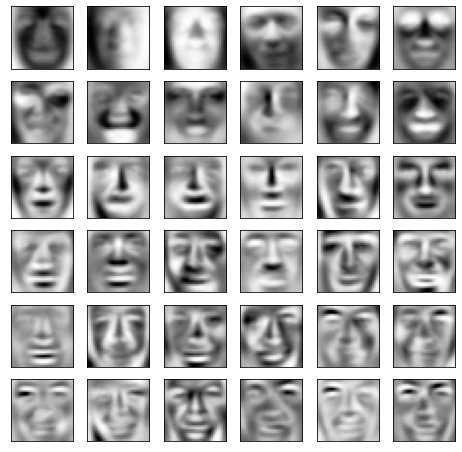

In [21]:
displayData(U[:,:36].T, 6, 6)

## 降维

In [22]:
z = projectData(X_norm, U, K=36)

## 重建数据

In [23]:
X_rec = recoverData(z, U, K=36)

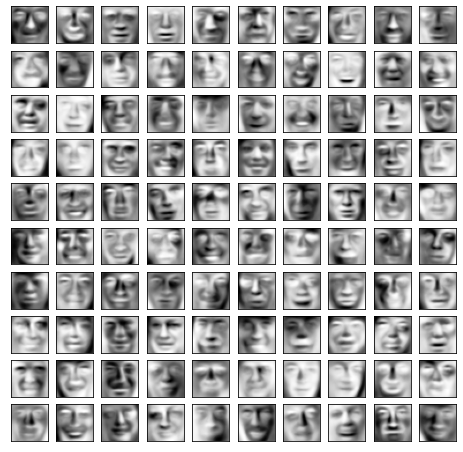

In [24]:
displayData(X_rec, 10, 10)